# **Lista 1** de Aprendizagem Automática

## **Assuntos:** Regressão Linear, Polinomial e Regularização

*   **Aluna:** Bárbara Neves
*   **Matrícula:** 507526

---

> <font color='blue'>**Jupyter notebook desenvolvido no Google Colab.**</font> Também pode ser acessado através do [link](https://github.com/barbaraneves/masters-machine-learning-course) no GitHub, sem alterações após o envio pelo SIGAA.









# Imports

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# Função para divisão dos dados
from sklearn.model_selection import train_test_split
# Função para normalização dos dados
from sklearn.preprocessing import MinMaxScaler

# Visualizações

Funções chave para as visualizações usadas para responder as questões.

In [ ]:
# Constants
figsize = (6, 4)
titlesize = 14
fontsize = 12

# Plota a reta resultante sobre os dados
def plot_regression_line(X, y, beta, title=None, xlabel="", ylabel=""):
  plt.figure(figsize=figsize)
  plt.rcParams.update({'font.size': fontsize})
  
  #find line of best fit
  b, a = beta

  #add points to plot
  plt.scatter(X, y, color='slategray')

  #add line of best fit to plot
  plt.plot(X, a*X+b, color='firebrick')

  if not title:
    plt.title('Equação da Regressão\ny = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', fontsize=titlesize)   

  #add axis labels
  plt.xlabel(xlabel, fontsize=fontsize)
  plt.ylabel(ylabel, fontsize=fontsize)

  plt.show()

# Plota a curva de aprendizagem
def plot_loss_path(loss, title=""):
  plt.figure(figsize=figsize)
  plt.rcParams.update({'font.size': fontsize})

  plt.plot(range(1,len(loss) + 1), loss, '-k', color='firebrick')

  plt.title(title, fontsize=titlesize)   
  plt.xlabel('Iterações', fontsize=fontsize)
  plt.ylabel('Função de custo', fontsize=fontsize)

  plt.show()

# Questão 1

Considere o conjunto de dados disponível em `artificial1d.csv` organizado em duas colunas, $x$ e $y$. Seja um modelo de regressão linear para $\hat{y} = f(x)$.

In [ ]:
df1 = pd.read_csv('artificial1d.csv', header=None)
df1.rename(columns={
    0: 'x',
    1: 'y'
}, inplace=True)

df1.head()

,x,y
0,-1.000000,-2.082017
1,-0.931034,-1.326980
2,-0.862069,-1.105598
3,-0.793103,-0.873946
4,-0.724138,-0.285027


In [ ]:
df1.describe()

,x,y
count,3.000000e+01,30.000000
mean,-2.960595e-17,0.067618
std,6.071316e-01,1.065356
min,-1.000000e+00,-2.082017
25%,-5.000000e-01,-0.870920
50%,0.000000e+00,0.098189
75%,5.000000e-01,0.957162
max,1.000000e+00,2.309838


In [ ]:
X1 = df1['x'].values
y1 = df1['y'].values

X1.shape, y1.shape

((30,), (30,))

## a) OLS - Parâmetros e MSE

Abaixo está o plots da **reta resultante** sobre os dados.

In [ ]:
def ols(X, y):
  X_ = np.c_[np.ones(X.shape[0]), X]

  # Calculando a matriz de coeficientes beta usando a fórmula OLS
  beta = np.linalg.pinv(X_) @ y

  # Calculando o MSE
  mse = np.mean((y - X_ @ beta)**2)

  return beta, mse

In [ ]:
beta_ols, mse_ols = ols(X1, y1)

print("Parâmetros obtidos via OLS:", beta_ols)
print("Valor do MSE:", mse_ols)

Parâmetros obtidos via OLS: [0.06761792 1.57486517]
Valor do MSE: 0.21340090132936984


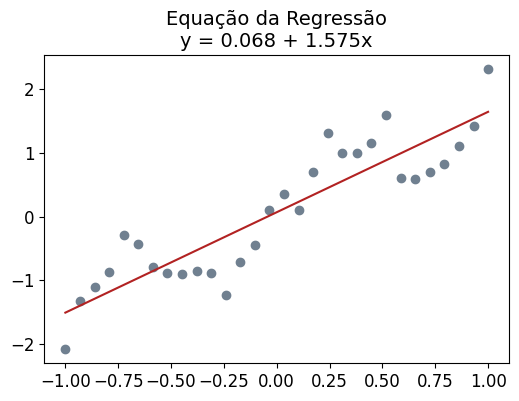

In [ ]:
plot_regression_line(X1, y1, beta=beta_ols)

## b) GD - Parâmetros e MSE

Abaixo estão os plots da **reta resultante** sobre os dados e da **curva de aprendizagem** obtida pelo **GD**.

In [ ]:
def gd_univariate(X, y, alpha, epochs):  
  X_ = np.c_[np.ones(X.shape[0]), X]
  beta = np.zeros(X_.shape[1])

  mse_history = []
  # Loop para atualizar os coeficientes
  for epoch in range(epochs):
    # Calculando o gradiente da função de custo em relação aos coeficientes
    grad = X_.T.dot(X_.dot(beta) - y) / y.size

    # Atualizando os coeficientes
    beta -= alpha * grad
    mse_history.append(np.mean((y - X_ @ beta)**2))

  return beta, mse_history

In [ ]:
beta_gd, mse_history_gd = gd_univariate(X1, y1, alpha=10**-2, epochs=100*X1.shape[0])

print("Parâmetros obtidos via GD univariado:", beta_gd)
print("Valor do MSE:", mse_history_gd[-1])

Parâmetros obtidos via GD univariado: [0.06761792 1.57482997]
Valor do MSE: 0.2134009017707687


<ipython-input-2-7a034aa6cb5c>:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-k" (-> color='k'). The keyword argument will take precedence.
  plt.plot(range(1,len(loss) + 1), loss, '-k', color='firebrick')


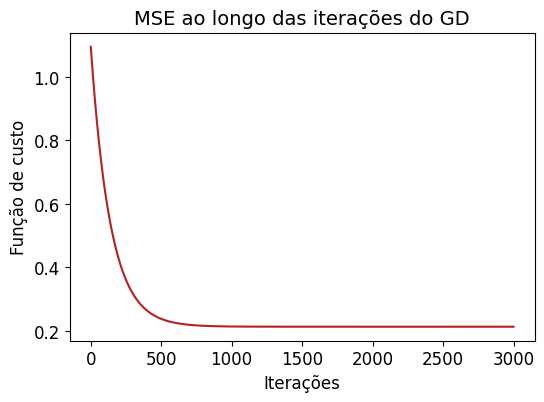

In [ ]:
plot_loss_path(mse_history_gd, title='MSE ao longo das iterações do GD')

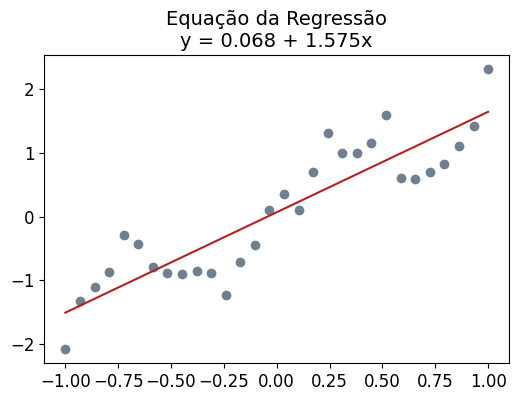

In [ ]:
plot_regression_line(X1, y1, beta=beta_gd)

## c) SGD - Parâmetros e MSE

Abaixo estão os plots da **reta resultante** sobre os dados e da **curva de aprendizagem** obtida pelo **SGD**.

In [ ]:
def sgd(X, y, alpha, epochs):  
  X_ = np.c_[np.ones(X.shape[0]), X]
  beta = np.zeros(X_.shape[1])

  mse_history = []

  for epoch in range(epochs):
    # Embaralhando os dados
    indices = np.random.permutation(y.shape[0])
    X_ = X_[indices]
    y = y[indices]

    # Loop para atualizar os coeficientes 
    for i in range(X_.shape[0]):
      x_i = X_[i]
      y_i = y[i]

      # Calculando o gradiente da função de custo em relação aos coeficientes beta
      grad = (x_i.T.dot(x_i.dot(beta) - y_i)) / x_i.shape[0]

      # Atualizando os coeficientes beta usando o gradiente descendente estocástico
      beta -= alpha * grad
    mse_history.append(np.mean((y - X_ @ beta)**2))

  return beta, mse_history

In [ ]:
beta_sgd, mse_history_sgd = sgd(X1, y1, alpha=10**-2, epochs=150)

print("Parâmetros obtidos via SGD:", beta_sgd)
print("Valor do MSE:", mse_history_sgd[-1])

Parâmetros obtidos via SGD: [0.06835242 1.57480579]
Valor do MSE: 0.21340144206504782


<ipython-input-2-7a034aa6cb5c>:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-k" (-> color='k'). The keyword argument will take precedence.
  plt.plot(range(1,len(loss) + 1), loss, '-k', color='firebrick')


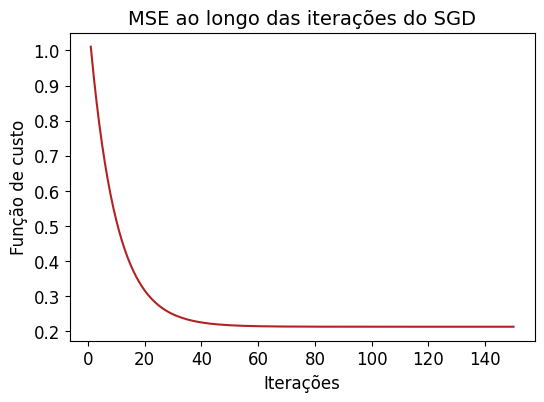

In [ ]:
plot_loss_path(mse_history_sgd, title='MSE ao longo das iterações do SGD')

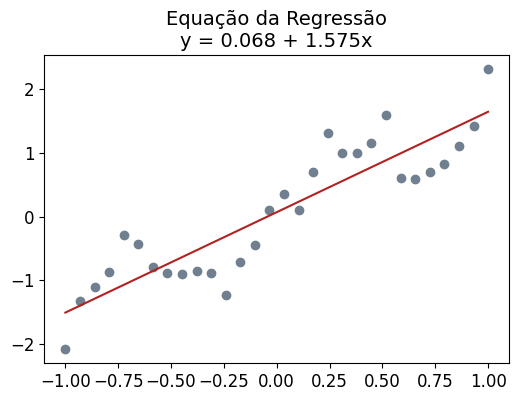

In [ ]:
plot_regression_line(X1, y1, beta=beta_sgd)

# Questão 2

Considere o conjunto de dados disponível em `california.csv`, organizado em 9
colunas, sendo as 8 primeiras colunas os atributos e a última coluna a saída. Os 8 atributos são usados na predição da mediana de preços de casas em distritos da Califórnia na década de 1990.

---

**Nota:** Normalize os dados (MinMax) antes do treinamento/teste (antes de criar
os regressores polinomiais) e "desnormalize" antes de calcular o RMSE.

In [ ]:
df2 = pd.read_csv('california.csv', header=None)

df2.head()

,0,1,2,3,4,5,6,7,8
0,4.1685,20.0,6.700637,1.178344,745.0,2.372611,38.80,-121.15,2.175
1,2.8194,24.0,4.762500,1.020833,608.0,2.533333,36.75,-119.85,0.811
2,2.4250,46.0,4.927711,1.018072,772.0,2.325301,36.33,-119.31,0.849
3,3.1205,16.0,3.728477,1.101545,1260.0,2.781457,33.87,-117.99,1.740
4,4.3889,41.0,5.741007,1.199041,837.0,2.007194,34.15,-118.40,3.804


In [ ]:
df2.describe()

,0,1,2,3,4,5,6,7,8
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.948099,28.733000,5.417844,1.087299,1423.847000,2.897038,35.765440,-119.708800,2.111088
std,1.873914,12.961239,1.875375,0.285668,1396.022801,0.763631,2.197077,2.023945,1.142300
min,0.706800,2.000000,1.411290,0.526316,9.000000,1.345506,32.550000,-124.180000,0.325000
25%,2.674075,18.000000,4.458198,1.006177,774.500000,2.408481,33.920000,-121.880000,1.242500
50%,3.667450,29.000000,5.281518,1.046735,1169.500000,2.794112,34.420000,-118.905000,1.850500
75%,4.788375,38.000000,6.031825,1.097236,1681.000000,3.248397,37.760000,-118.040000,2.695500
max,15.000000,52.000000,26.465969,5.424084,28566.000000,9.196203,41.860000,-115.490000,5.000010


In [ ]:
X2 = df2.iloc[:, :-1].values
y2 = df2.iloc[:, -1:].values

X2.shape, y2.shape

((1000, 8), (1000, 1))

## a) Dividindo o Conjunto de Dados

In [ ]:
# Usando a função do Scikit-learn para dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((800, 8), (800, 1)), ((200, 8), (200, 1)))

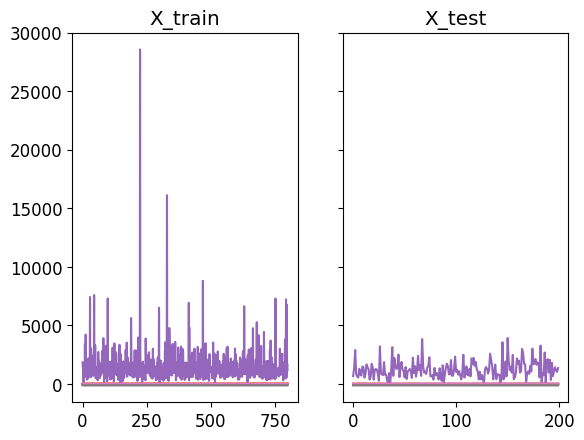

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.plot(X_train)
ax2.plot(X_test)

ax1.set_title('X_train')
ax2.set_title('X_test');

### Normalizando os Dados

In [ ]:
scaler = MinMaxScaler()

X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

(X_train_normalized.shape, y_train.shape), (X_test_normalized.shape, y_test.shape)

(((800, 8), (800, 1)), ((200, 8), (200, 1)))

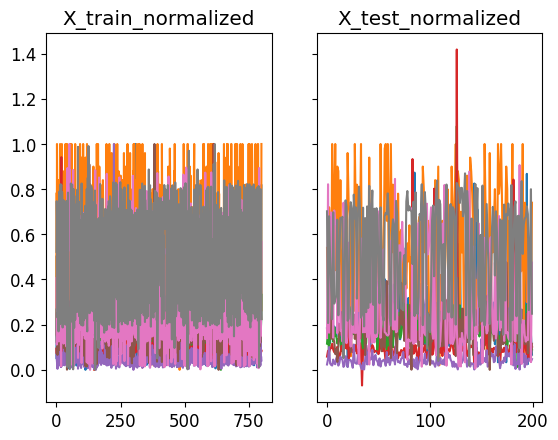

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.plot(X_train_normalized)
ax2.plot(X_test_normalized)

ax1.set_title('X_train_normalized')
ax2.set_title('X_test_normalized');

## b) e c) Treinando Modelos de Regressão Polinomial

*   Ordens de 1 a 13
*   Uso do algoritmo OLS

Abaixo está o **gráfico** reportando o **RMSE** para o **treino e teste** seguindo as **ordens do polinômio**.

In [ ]:
def ols_poly(X, y, order, lamb=None):
  # Criando a matriz de X com a ordem dada
  X_ = np.column_stack([X**i for i in range(1, order+1)])

  if lamb is None:
    beta = np.linalg.pinv(X_) @ y
  else:
    reg_matrix = lamb*np.eye(X_.shape[1])
    reg_matrix[0,0] = 0
    beta = np.linalg.inv(X_.transpose() @ X_ + reg_matrix) @ X_.transpose() @ y

  # Calculando o valor atual do RMSE
  rmse = np.sqrt(np.mean((y - X_ @ beta)**2))

  def regression_func(x):
    return sum([beta[i] * x**i for i in range(order)])

  return regression_func, rmse

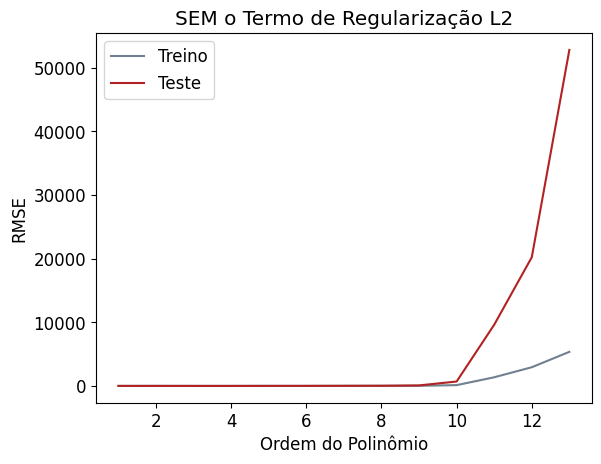

In [ ]:
rmse_train = []
rmse_test = []
orders = range(1, 14)

for order in orders:
  regression_func, _ = ols_poly(X_train_normalized, y_train, order)

  y_train_pred = regression_func(X_train_normalized)
  y_test_pred = regression_func(X_test_normalized)
  
  rmse_train.append(np.sqrt(np.mean((y_train_pred - y_train)**2)))
  rmse_test.append(np.sqrt(np.mean((y_test_pred - y_test)**2)))

# Plotando o RMSE para treino e teste
plt.plot(range(1, 14), rmse_train, label='Treino', color='slategray')
plt.plot(range(1, 14), rmse_test, label='Teste', color='firebrick')
plt.title("SEM o Termo de Regularização L2")
plt.xlabel('Ordem do Polinômio')
plt.ylabel('RMSE')
plt.legend()
plt.show()

## d) Incluindo o Termo de Regularização L2

* Fator $\lambda = 0.01$



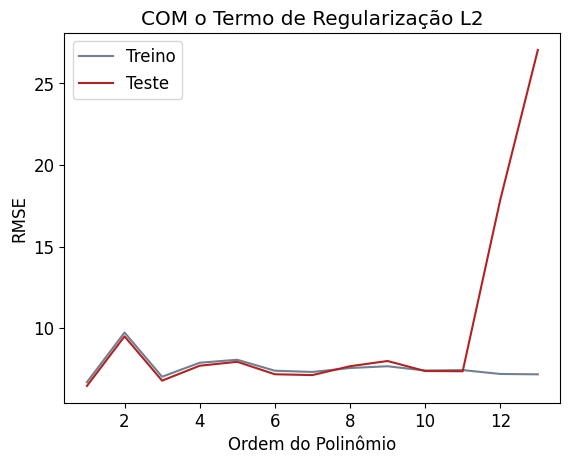

In [ ]:
rmse_train = []
rmse_test = []
orders = range(1, 14)

for order in orders:
  regression_func, _ = ols_poly(X_train_normalized, y_train, order, lamb=0.01) # Diferença em relação ao código anterior

  y_train_pred = regression_func(X_train_normalized)
  y_test_pred = regression_func(X_test_normalized)
  
  rmse_train.append(np.sqrt(np.mean((y_train_pred - y_train)**2)))
  rmse_test.append(np.sqrt(np.mean((y_test_pred - y_test)**2)))

# Plotando o RMSE para treino e teste
plt.plot(range(1, 14), rmse_train, label='Treino', color='slategray')
plt.plot(range(1, 14), rmse_test, label='Teste', color='firebrick')
plt.title("COM o Termo de Regularização L2")
plt.xlabel('Ordem do Polinômio')
plt.ylabel('RMSE')
plt.legend()
plt.show()